In [2]:
# Core libraries for data handling and modeling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

### Part 1: Data Exploration and Preparation

# 1. Load the Data
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)


In [3]:

# 2. Initial Data Inspection
print("----------- Initial Data Inspection -----------")
print("\nFirst 5 rows of the dataset:")
print(df.head())


----------- Initial Data Inspection -----------

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:

print("\n\nDataset Info (checking for missing values and types):")
df.info()




Dataset Info (checking for missing values and types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:

# Check the class balance for the 'smoker' column
print("\n\nClass Balance for Smokers:")
print(df['smoker'].value_counts(normalize=True))




Class Balance for Smokers:
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64


In [6]:

print("\n\nStatistical Summary of Numerical Columns:")
print(df.describe())




Statistical Summary of Numerical Columns:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [7]:

# 3. Handle Categorical Data
df_processed = pd.get_dummies(df, drop_first=True)
print("\n\n----------- Processed DataFrame -----------")
print("\nFirst 5 rows of the processed dataset with dummy variables:")
print(df_processed.head())




----------- Processed DataFrame -----------

First 5 rows of the processed dataset with dummy variables:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [8]:


### Part 2: Task A - Regression (Predicting Insurance Charges)

print("\n\n----------- Part 2: Regression Model -----------")
# 4. Define Features (X) and Target (y)
X_reg = df_processed.drop('charges', axis=1)
y_reg = df_processed['charges']




----------- Part 2: Regression Model -----------


In [9]:

# 5. Split the Data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 6. Train a Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)
print("\nLinear Regression model trained successfully.")



Linear Regression model trained successfully.


In [10]:

# 7. Evaluate the Regression Model
reg_predictions = regression_model.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, reg_predictions))
print(f"\nRegression Model RMSE: ${rmse:.2f}")



Regression Model RMSE: $5796.28


In [11]:


### Part 3: Task B - Classification (Predicting if Someone is a Smoker)

print("\n\n----------- Part 3: Classification Model (Corrected) -----------")
# 8. Define Features (X) and Target (y)
X_cls = df_processed.drop(['smoker_yes', 'charges'], axis=1)
y_cls = df_processed['smoker_yes']




----------- Part 3: Classification Model (Corrected) -----------


In [12]:

# 9. Split the Data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [13]:

# 10. Train a Logistic Regression Model (with the fix)
# ========================= THE FIX IS HERE =========================
# We add class_weight='balanced' to force the model to pay more attention
# to the minority class (smokers), preventing it from only predicting the majority class.
classification_model = LogisticRegression(max_iter=1000, class_weight='balanced')
# =================================================================

classification_model.fit(X_train_cls, y_train_cls)
print("\nLogistic Regression model trained successfully with balanced class weights.")



Logistic Regression model trained successfully with balanced class weights.



Classification Model Accuracy: 0.5597


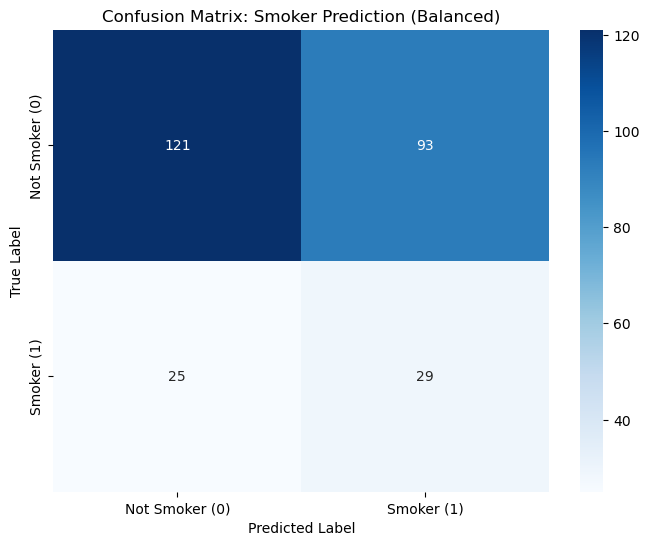

In [14]:

# 11. Evaluate the Classification Model
cls_predictions = classification_model.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, cls_predictions)
print(f"\nClassification Model Accuracy: {accuracy:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test_cls, cls_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Smoker (0)', 'Smoker (1)'],
            yticklabels=['Not Smoker (0)', 'Smoker (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Smoker Prediction (Balanced)')
plt.show()
